## Event Driven Simulation 

### Scheduling CoMP

In [1]:
import edsog as eds
import simpy
import numpy as np
import pandas as pd
import scipy
SCHEDULE_T=2
import matplotlib.pyplot as plt
import show as sh

In [2]:
env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list2=np.array([])
#define UEs

    
max_prb=50
thr=6
cluster=[19,20]

ue_nr=100

x=np.append(np.ones(ue_nr)*19,np.ones(ue_nr)*20)
y=np.append(np.ones(ue_nr)*20,np.ones(ue_nr)*19)
sinr=np.random.randint(-5,15,ue_nr*2)
sinr2=np.random.randint(0,18,ue_nr*2)

rt_nrt=np.array([])
rt_nrt=np.append(rt_nrt,np.ones(ue_nr*2)*0)

df=pd.DataFrame()
df['PCI Serving']=x
df['PCI Coord']=y
df['JT_1 SINR [lin]']=sinr
df['JT_2 SINR [lin]']=sinr2
df['usage']=rt_nrt
df['id']=np.arange(0,ue_nr*2)
   
df['PCI Serving']=df['PCI Serving'].astype('int')
df['PCI Coord']=df['PCI Coord'].astype('int')

df['JT_1 SINR [lin]']=df['JT_1 SINR [lin]'].astype('int')
df['JT_2 SINR [lin]']=df['JT_2 SINR [lin]'].astype('int')

In [3]:
df2=df

In [4]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,160))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS-1\edsog.py:156: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS-1\edsog.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


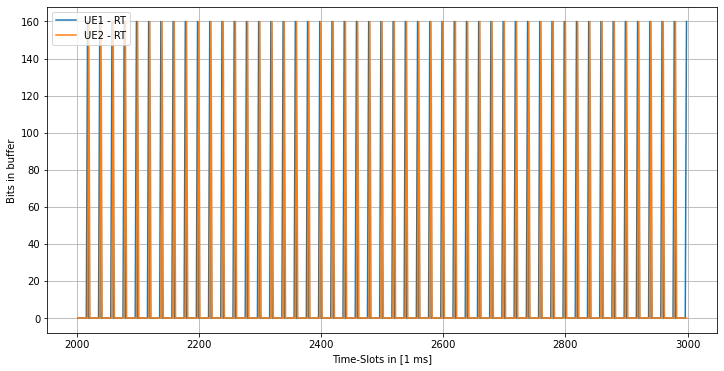

In [5]:
plt.figure(figsize=(12,6))
plt.plot(list(ue_all[20].mon.keys())[1000:3000],list(ue_all[20].mon.values())[1000:3000],label='UE1 - RT')
plt.plot(list(ue_all[30].mon.keys())[1000:3000],list(ue_all[30].mon.values())[1000:3000],label='UE2 - RT')
#plt.plot(list(ue_all[47].mon.keys()),list(ue_all[47].mon.values()),label='UE3 - RT')
#plt.plot(list(ue_list[120].mon.keys())[1000:3000],list(ue_list[120].mon.values())[1000:3000],label='UE4')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [6]:
df=eds.ue_to_df(ue_all[0:49])

No handles with labels found to put in legend.


-0.0008940466582285644
0
-0.675830014131007
0
0.06803293492463336
1
-6.08620552289274e-05
0
0.0
0
-0.6908153153518448
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
-0.0003582156312575968
0
-0.0002523458347503116
0
0.0
0
0.07627881280682924
1
0.0
0
0.27390421322717184
1
0.10707817308817091
1
0.06912153493778828
1
0.0
0
0.08514483089401281
1
-0.00021667277591008727
0
0.0
0
0.0
0
0.11668201643417753
1
0.08006629349557315
1
0.0
0
0.10849848819667329
1
0.07383412868600114
1
0.08800164880118366
1
0.0
0
0.09839241740252636
1
-0.00012638335473713624
0
-0.44157505255957297
0
0.0
0
0.0
0
0.0
0
-0.46240770408422227
0
0.11153555178524677
1
0.0
0
0.0
0
0.09051037748770696
1
0.0
0
0.08286725501669423
1
0.0
0
0.1292907221848827
1
0.0
0
0.0
0
0.0
0
0.0
0
0.14242630033600712
1
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.08800164880118366
1
0.10385190614872197
1
-0.6942898422290122
0
0.0
0
0.07837842172822018
1
0.0
0
0.09895176697638508
1
0.0
0
0.0
0
-2.988151126537275e-06
0
0.06912153493778828
1
0.156903

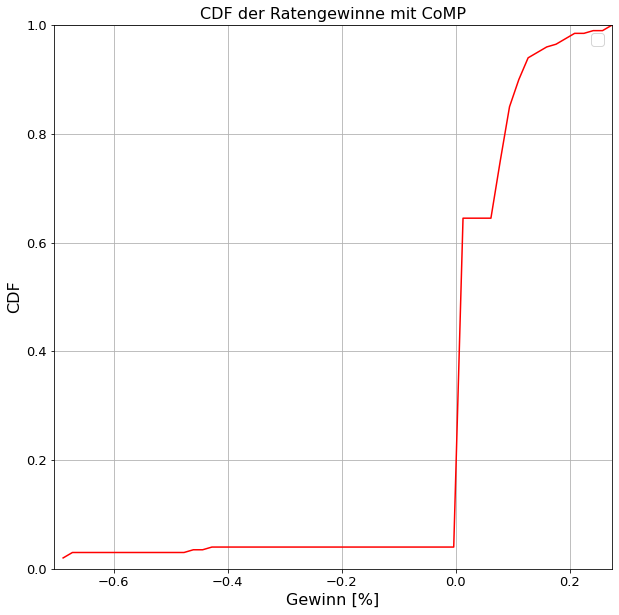

In [7]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [8]:
print('comp prb perc',prb_number_comp/(prb_number_normal+prb_number_comp))
print('comp user perc',len(ue_comp)/len(ue_all))

comp prb perc 0.56
comp user perc 0.355


In [9]:
df=df2
env=simpy.Environment()

In [10]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,1600))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS-1\edsog.py:156: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS-1\edsog.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


0.6380105150183123
0
0.92631959647134
0
2.3221335873596964
1
0.6636566576585881
0
0.6493947640714552
0
0.5807010901252596
0
0.6743473990998514
0
0.6608868738710109
0
0.6593390160380277
0
0.6450871594218649
0
0.6520203894800154
0
0.6332284873713018
0
0.6627176087164828
0
1.0085876620602838
0
0.39548198559206593
0
2.8988608445449753
1
0.6664465488362382
0
1.5223946358191445
1
2.184690308987439
1
2.2574889272706207
1
0.657262137014676
0
1.414012678630498
1
0.6434413538184737
0
0.6597000464586984
0
0.6387143820725946
0
1.694636408575366
1
2.0119975173960865
1
0.6659406495580195
0
1.4975179155206435
1
3.4862356285357294
1
2.6080723427040358
1
0.646292773170507
0
3.912483920102149
1
0.6627954071757323
0
0.6620481697879786
0
0.6598783694813636
0
0.6708361055912131
0
0.6373923538064131
0
0.6590303131654247
0
1.4836043092168851
1
0.6449935741584317
0
0.6487020867064373
0
2.164781786475143
1
0.6508098056070712
0
1.1061623036699126
1
0.6456573239022249
0
1.8722926502555732
1
0.6507290011167156
0


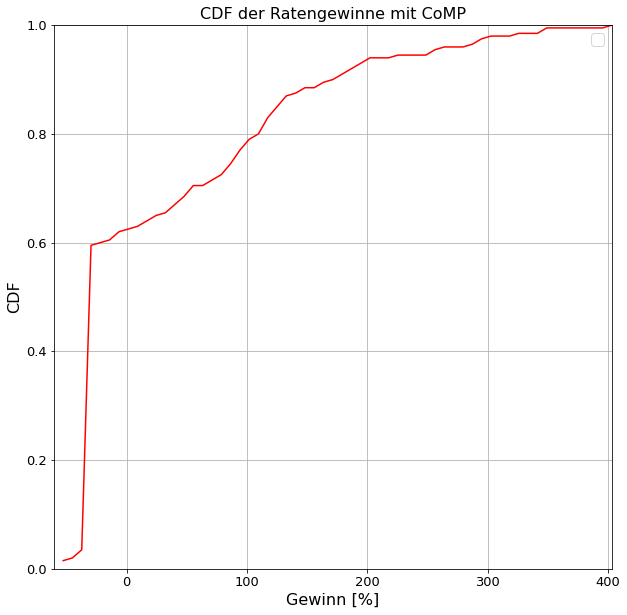

In [11]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(i.mR2/i.mR)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)


sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [12]:
df=df2
env=simpy.Environment()
max_prb=30


ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,1600))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS-1\edsog.py:156: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS-1\edsog.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


0.638292113157457
0
0.46635909764273076
0
1.1138738185564192
1
0.6612736476021698
0
0.6500275484661378
0
0.46135876358165306
0
0.6471777271128187
0
0.6229296865605229
0
0.634544327586197
0
0.6357553562159842
0
0.6766421407704005
0
0.6485056475117057
0
0.6428485583379634
0
0.459769461792423
0
0.4603964049817567
0
3.0252879036468543
1
0.6644423327855767
0
1.6086222484570103
1
1.4305433853451857
1
0.9528381684273343
1
0.6398714429872182
0
1.5081846471043445
1
0.653494081711893
0
0.6386104316294564
0
0.6625211195343479
0
0.8548572148844662
1
1.9884078129121305
1
0.650012811880564
0
1.6203182599742687
1
1.8558534513361922
1
2.7057907299871333
1
0.6420211019062305
0
4.200487565435231
1
0.6624214355473239
0
0.6558006235079372
0
0.6500012080759692
0
0.6599940571479909
0
0.6536720253256224
0
0.6581502988039505
0
1.5226731537565203
1
0.6534903371272099
0
0.6610769135038498
0
2.166407699130916
1
0.6624266113875347
0
1.020666709983404
1
0.6500077484926816
0
2.0399315850901933
1
0.6610268575143807


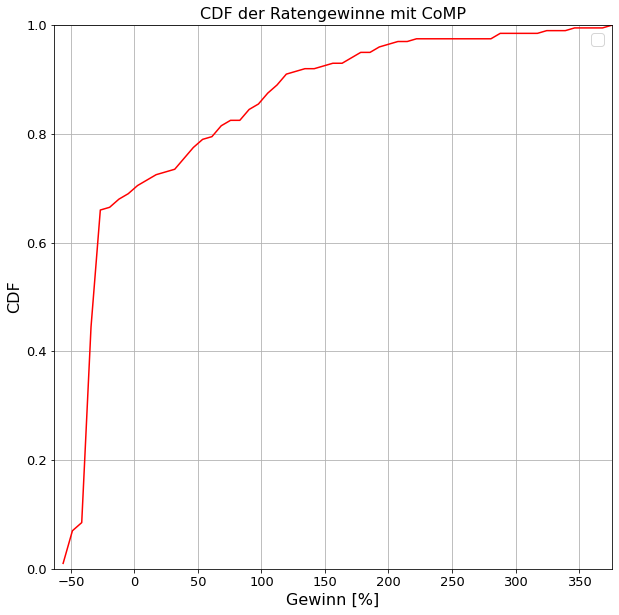

In [13]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(i.mR2/i.mR)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [14]:
df=df2
env=simpy.Environment()
max_prb=30

ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=29
prb_number_normal=1

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,1600))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS-1\edsog.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))
C:\Users\Caroline Zoll\EDS-1\edsog.py:156: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))


No handles with labels found to put in legend.


0.050000638957450196
0
0.04205715756951591
0
1.959135996937195
1
0.05110348645771008
0
0.04912390738884775
0
0.031843893082376395
0
0.05013295347979983
0
0.04797620318076837
0
0.05202475568236837
0
0.05003456366083438
0
0.05105484345041147
0
0.05112460870950749
0
0.04993984476341942
0
0.03193464174229387
0
0.03311624822935527
0
4.979997314710337
1
0.04908125053337597
0
2.6409743303501023
1
2.2862119430940027
1
1.6935428884006343
1
0.050241560926741
0
2.5413939859015917
1
0.049989393257457264
0
0.04895178014045475
0
0.05008000931605532
0
1.442384291083545
1
3.470586858182811
1
0.050761888084701924
0
2.7783876991134004
1
2.318891292596458
1
4.697863728763051
1
0.05110470122934036
0
7.019149603655869
1
0.05098992395728265
0
0.05010932335250119
0
0.04976811986298579
0
0.04956508131303171
0
0.05074674734818016
0
0.05021649035225347
0
2.6573492153445013
1
0.05074864377538103
0
0.05074849843693525
0
3.7174876451416
1
0.05091055623372181
0
1.7721400195615256
1
0.0518923715048583
0
3.3628351538

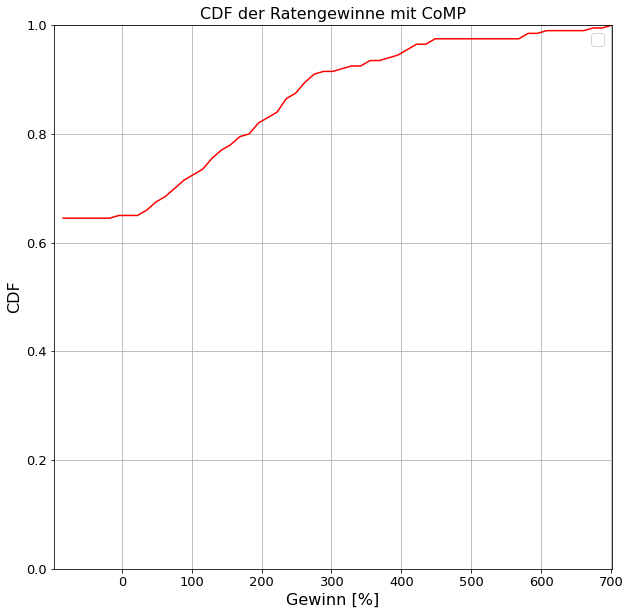

In [15]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(i.mR2/i.mR)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)
